In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams['text.usetex'] = True
params = {
    "backend": "ps",
    "axes.labelsize": 22,
    "font.size": 22,
    "legend.fontsize": 10,
    "xtick.labelsize": 20,
    "ytick.labelsize": 20,
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "Computer Modern Roman",
    "legend.frameon": True,
    "savefig.dpi": 100,
    "axes.linewidth": 1.5,
    'xtick.major.size' : 10,
    'xtick.major.width': 1,
    'xtick.minor.size': 7,
    'xtick.minor.width': 1,
    'ytick.major.size' : 10,
    'ytick.major.width': 1,
    'ytick.minor.size': 7,
    'ytick.minor.width': 1,
    'axes.xmargin' : 0,
    'axes.ymargin' : 0,
}
plt.rcParams.update(params)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

In [2]:
def import_npz(npz_file):
    Data = np.load(npz_file, allow_pickle=True)
    for varName in Data:
        globals()[varName] = Data[varName]

fname = ['w_r=0.8', 'w_r=1.3']

evals_list = []
wr_list = []

for j in range(2):
    data = np.load('../../data/charge_qubit/floquet_spectrum/'+fname[j]+'_N_rep=20_n_states=2_dim=2.npz')
    A_list = data['A_list_replica']
    N_replicas = data['N_replicas']
    evals_list.append(data['evals_list'])
    wr_list.append(data['w_r'])

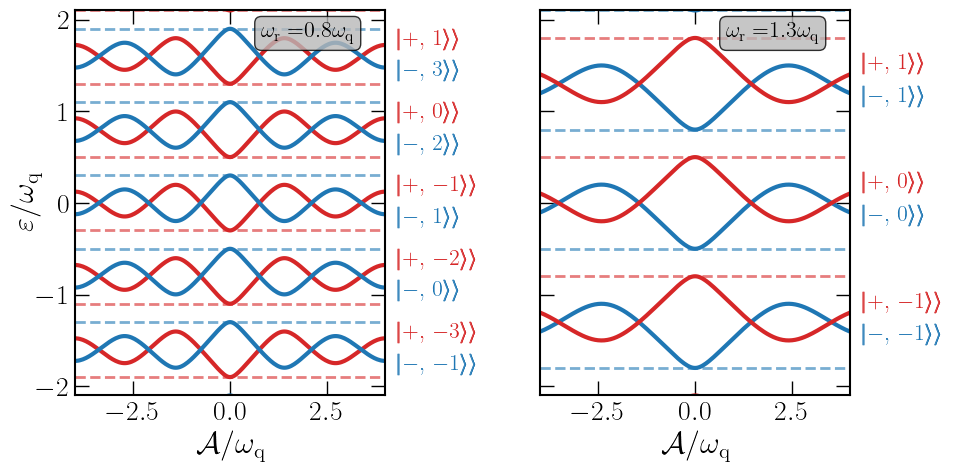

In [3]:
%matplotlib inline

import matplotlib.colors as mcolors
cmap = mpl.colormaps["tab10"]  # type: matplotlib.colors.ListedColormap
colors = cmap.colors  # type: list

props = dict(boxstyle='round', facecolor='#b8b8b8a6', alpha=0.8)

fig, ax = plt.subplots(1,2, figsize=(10,5), dpi=100)
fig.subplots_adjust(wspace=0.5)

for ii,current_replica in enumerate(N_replicas):
    ax[0].plot(A_list, evals_list[0][ii][:,0], c=colors[0], lw=3)
    ax[0].plot(A_list, evals_list[0][ii][:,1], c=colors[3], lw=3)
    
    ax[1].plot(A_list, evals_list[1][ii][:,0], c=colors[0], lw=3)
    ax[1].plot(A_list, evals_list[1][ii][:,1], c=colors[3], lw=3)

    if current_replica < 0 :        
        string_current_replica = r'$-$'+str(np.abs(current_replica))
        offset = 2.45
    else :
        string_current_replica = str(np.abs(current_replica))
        offset = 2
        
    if current_replica==-1 or current_replica==0 or current_replica==1 or current_replica==2 or current_replica==3:
        ax[0].text(A_list[-1]+offset, evals_list[0][ii][:,0][-1]-0.1, r'$\pmb{\vert}$'+'$-$'+', '+string_current_replica+r'$\pmb{\rangle\rangle}$', ha='right', \
                        size=16, c=colors[0])
    if current_replica==-1 or current_replica==0 or current_replica==1 or current_replica==-2 or current_replica==-3:
        ax[0].text(A_list[-1]+offset, evals_list[0][ii][:,1][-1], r'$\pmb{\vert}$'+'$+$'+', '+string_current_replica+r'$\pmb{\rangle\rangle}$', ha='right', \
                        size=16, c=colors[3])

    if current_replica==-1 or current_replica==0 or current_replica==1:
        ax[1].text(A_list[-1]+offset, evals_list[1][ii][:,0][-1]-0.1, r'$\pmb{\vert}$'+'$-$'+', '+string_current_replica+r'$\pmb{\rangle\rangle}$', ha='right', \
                        size=16, c=colors[0])
        ax[1].text(A_list[-1]+offset, evals_list[1][ii][:,1][-1]+0.05, r'$\pmb{\vert}$'+'$+$'+', '+string_current_replica+r'$\pmb{\rangle\rangle}$', ha='right', \
                        size=16, c=colors[3])

    ax[0].axhline(y=evals_list[0][ii][int((len(A_list) - 1)/2),0], c=colors[0], ls='--', alpha=0.6, lw=2)
    ax[0].axhline(y=evals_list[0][ii][int((len(A_list) - 1)/2),1], c=colors[3], ls='--', alpha=0.6, lw=2)

    ax[1].axhline(y=evals_list[1][ii][int((len(A_list) - 1)/2),0], c=colors[0], ls='--', alpha=0.6, lw=2)
    ax[1].axhline(y=evals_list[1][ii][int((len(A_list) - 1)/2),1], c=colors[3], ls='--', alpha=0.6, lw=2)

ax[0].text(0.9, 0.93, r'$\omega_{\text{r}}=$'+str(wr_list[0])+r'$\omega_{\text{q}}$', ha='right', bbox=props, \
               transform=ax[0].transAxes, size=16)
ax[1].text(0.9, 0.93, r'$\omega_{\text{r}}=$'+str(wr_list[1])+r'$\omega_{\text{q}}$', ha='right', bbox=props, \
               transform=ax[1].transAxes, size=16)

ax[0].set_ylim([-2.1,2.1])
ax[1].set_ylim([-2.1,2.1])

ax[0].set_xlabel(r'$\mathcal A/\omega_{\rm q}$')
ax[1].set_xlabel(r'$\mathcal A/\omega_{\rm q}$')

ax[0].set_ylabel(r'$\varepsilon/\omega_{\rm q}$', labelpad=-4)

ax[0].xaxis.set_tick_params(direction="in", which='both')
ax[0].yaxis.set_tick_params(direction="in", which='both')

ax[0].tick_params(top=True, bottom=True, left=True, right=True, labelleft=True,
                  labelbottom=True, labelright=False, labeltop=False, which='both')

ax[1].xaxis.set_tick_params(direction="in", which='both')
ax[1].yaxis.set_tick_params(direction="in", which='both')

ax[1].tick_params(top=True, bottom=True, left=True, right=True, labelleft=False,
                  labelbottom=True, labelright=False, labeltop=False, which='both')

fname = '../figures/figS1'

fname = fname + '.pdf'
plt.savefig(fname, bbox_inches='tight')